In [1]:
######################## Data Prep & Test codes - START ###########################

import pandas as pd
import matplotlib.pyplot as plt
import pandasql as sqldf

In [2]:
visits=pd.read_csv('D:/studies/Interviews/HouZZ/visits.csv')
signups=pd.read_csv('D:/studies/Interviews/HouZZ/signups.csv')

In [6]:
from pandasql import *
import pandas as pd

pysqldf = lambda q: sqldf(q, globals())

q  = """
SELECT
  m.date
  , m.beef
  , b.births
FROM
  meat m
LEFT JOIN
  births b
    ON m.date = b.date
WHERE
    m.date > '1974-12-31';
"""

meat = load_meat()
births = load_births()

df = pysqldf(q)

In [17]:
q  = """
select
  *
from
  visits
limit 10;
"""

In [18]:
df = pysqldf(q)
df

,uid,dt
0,21655745,2016-11-11
1,22635182,2016-11-02
2,22361195,2016-07-24
3,22132291,2017-03-19
4,22639754,2017-02-15
5,22998116,2016-09-06
6,23344314,2016-10-05
7,22422820,2016-11-14
8,23642588,2017-04-07
9,23705466,2016-10-21


In [87]:
q="select count(*) from visits;"
res=pysqldf(q)
res

,count(*)
0,1028813


In [8]:
list(signups)

['Unnamed: 0', 'uid', 'signup_dt', 'auth_type', 'device']

In [19]:
signups.head()

,uid,signup_dt,auth_type,device
0,21639492,2016-06-01,C,1
1,21640161,2016-06-01,A,6
2,21640773,2016-06-01,C,5
3,21641605,2016-06-01,A,1
4,21643130,2016-06-01,C,6


In [90]:
q="select count(distinct uid) from signups;"
res=pysqldf(q)
res

,count(distinct uid)
0,71989


In [82]:
signups=signups[['uid','signup_dt','auth_type','device']]
visits=visits[['uid','dt']]
signups['device']=signups['device'].astype('str')
signups['uid']=signups['uid'].astype('str')
visits['uid']=visits['uid'].astype('str')
######################## Data Prep & Test codes - END ###########################

In [63]:
#################### Question 1 ##############################################

#1.b) Frequency plot of users at Auth type
hist_at="""
select auth_type,count(uid) as cnt_users from signups group by 1;
"""
hist_at=pysqldf(hist_at) 
newindex = hist_at.auth_type.values
#data2 = DataFrame(hist_at,index=newindex,columns=col[1:])
hist_at=hist_at.set_index(newindex)
hist_at=hist_at.sort_values(by='cnt_users', ascending=1)
hist_at

,auth_type,cnt_users
B,B,13485
A,A,18409
C,C,40095


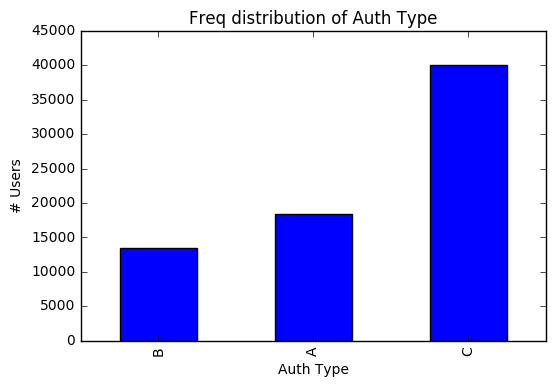

In [67]:

plot=hist_at[['cnt_users']].plot(kind='bar',legend=None,title="Freq distribution of Auth Type")
plot.set_xlabel("Auth Type")
plot.set_ylabel("# Users")
xlabels=hist_at.cnt_users.values
plt.show()

In [68]:
#1.a) Frequency plot of users at Devices
hist_d="""
select device,count(uid) as cnt_users from signups group by 1;
"""
hist_d=pysqldf(hist_d) 
newindex = hist_d.device.values
hist_d=hist_d.set_index(newindex)
hist_d=hist_d.sort_values(by='cnt_users', ascending=1)
hist_d

,device,cnt_users
3,3,791
4,4,3859
2,2,4981
7,7,6659
5,5,9957
6,6,13497
1,1,32245


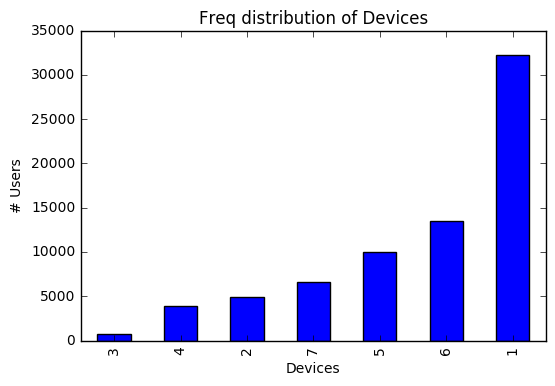

In [69]:

plot=hist_d[['cnt_users']].plot(kind='bar',legend=None,title="Freq distribution of Devices")
plot.set_xlabel("Devices")
plot.set_ylabel("# Users")
xlabels=hist_d.cnt_users.values
plt.show()

In [80]:
#1.c) Frequency plot of users at Devices - Auth Type
hist_d_at="""
select device,auth_type,count(uid) as cnt_users from signups group by 1,2;
"""
hist_d_at=pysqldf(hist_d_at) 
hist_d_at['device']=hist_d_at['device'].astype('str')
hist_d_at['dev_auth'] = hist_d_at[['device', 'auth_type']].apply(lambda x: '-'.join(x), axis=1)
#hist_d_at['dev_auth'] = hist_d_at.device.str.cat(hist_d_at.auth_type)
newindex = hist_d_at.dev_auth.values
#data2 = DataFrame(hist_at,index=newindex,columns=col[1:])
hist_d_at=hist_d_at.set_index(newindex)
hist_d_at=hist_d_at.sort_values(by='cnt_users', ascending=1)
hist_d_at.drop('dev_auth',axis=1)

,device,auth_type,cnt_users
4-B,4,B,22
5-B,5,B,59
3-A,3,A,187
3-C,3,C,295
3-B,3,B,309
2-B,2,B,643
2-A,2,A,1004
4-A,4,A,1007
7-A,7,A,2043
7-B,7,B,2187


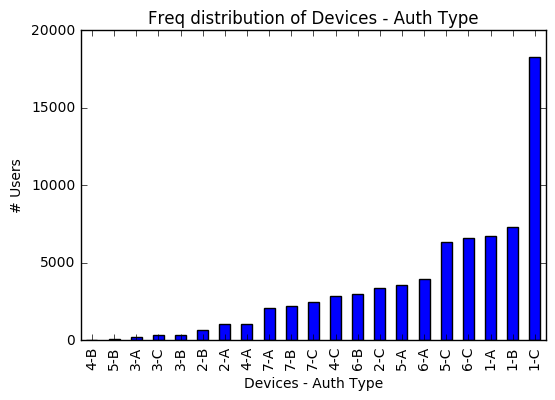

In [81]:
plot=hist_d_at[['cnt_users']].plot(kind='bar',legend=None,title="Freq distribution of Devices - Auth Type")
plot.set_xlabel("Devices - Auth Type")
plot.set_ylabel("# Users")
xlabels=hist_d_at.cnt_users.values
plt.show()

#################### Question 1 - End ##############################################

In [104]:
######################## Test #################################
q="select strftime('%m', signup_dt) as Month,count(uid) as cnt from signups group by 1;"
res=pysqldf(q)
res

,Month,cnt
0,06,12863
1,07,14433
2,08,14116
3,09,13647
4,10,15442
5,11,1488


In [175]:
q="select strftime('%m', signup_dt) as Month,auth_type,count(uid) as cnt from signups group by 1,2;"
res=pysqldf(q)
res

,Month,auth_type,cnt
0,06,A,3387
1,06,B,2091
2,06,C,7385
3,07,A,3736
4,07,B,2825
5,07,C,7872
6,08,A,3535
7,08,B,2728
8,08,C,7853
9,09,A,3524


In [ ]:
q="select strftime('%m', signup_dt) as Month,count(uid) as cnt from signups group by 1;"
res=pysqldf(q)
res

In [125]:
q="select strftime('%Y', dt)||'-'||strftime('%m', dt) as Month,count(uid) as cnt from visits group by 1;"
res=pysqldf(q)
res
########################### Test - END ################################################

,Month,cnt
0,2016-06,42084
1,2016-07,80962
2,2016-08,109792
3,2016-09,126079
4,2016-10,149993
5,2016-11,125828
6,2016-12,82771
7,2017-01,86810
8,2017-02,75752
9,2017-03,81916


In [219]:
######################### Question 2 #########################################
q2="""
select count(uid_j) as cnt_july,sum(case when uid_o IS NULL then 0 else 1 end) as cnt_oct,printf("%.2f",(sum(case when uid_o IS NULL then 0 else 1 end)*100.0)/count(uid_j)) as per_vistors 
    from
        (select july.uid as uid_j,oct.uid as uid_o 
        from 
            (select uid from signups where signup_dt between '2016-07-01' and '2016-07-31') july
        left join 
            (select uid from visits where dt between '2016-10-01' and '2016-10-31' group by 1) oct
        on
            july.uid=oct.uid
        ) as full;
"""
res2=pysqldf(q2)
res2.head()

,cnt_july,cnt_oct,per_vistors
0,14433,6025,41.74


In [220]:
######################### Question 3 ###############################################
# August Cohort visits in 5 months
q3a=""" 
select Aug.uid,YMonth,auth_type from
    (select uid,auth_type from signups where signup_dt between '2016-08-01' and '2016-08-31') Aug
inner join
    (select uid,(strftime('%Y', dt)||'-'||strftime('%m', dt)) as YMonth 
    from 
     visits 
    where 
       dt between '2016-09-01' and '2017-01-31' group by 1,2
    )as fivemonth

on
    aug.uid=fivemonth.uid
order by YMonth
"""
res3a=pysqldf(q3a)
res3a.head()

,uid,YMonth,auth_type
0,22496138,2016-09,C
1,22496554,2016-09,B
2,22496629,2016-09,C
3,22496641,2016-09,C
4,22501458,2016-09,C


In [191]:
# Table for Bar graph - August
q3a1="""
select Ymonth,count(uid) as user_cnt,printf("%.2f",count(uid)*100/14116.0) as per_usr_cnt from res3a group by 1"""
res3a1=pysqldf(q3a1)
res3a1.head()

,YMonth,user_cnt,per_usr_cnt
0,2016-09,8693,61.58
1,2016-10,6890,48.81
2,2016-11,5892,41.74
3,2016-12,4928,34.91
4,2017-01,4849,34.35


In [185]:
# Table for Auth Type Graph - August
q3a2="""
select allmonth.*,aug_cnt, printf("%.2f",(user_cnt*100.0)/aug_cnt ) as per_auth from
(select Ymonth,auth_type,count(uid) as user_cnt from res3a group by 1,2) as allmonth
inner join
(select auth_type,count(uid) as aug_cnt from signups where signup_dt between '2016-08-01' and '2016-08-31' group by 1) as aug
on 
aug.auth_type=allmonth.auth_type
"""
res3a2=pysqldf(q3a2)
res3a2

,Ymonth,auth_type,user_cnt,aug_cnt,per_auth
0,2016-09,A,2093,3535,59.21
1,2016-09,B,1616,2728,59.24
2,2016-09,C,4984,7853,63.47
3,2016-10,A,1625,3535,45.97
4,2016-10,B,1284,2728,47.07
5,2016-10,C,3981,7853,50.69
6,2016-11,A,1356,3535,38.36
7,2016-11,B,1011,2728,37.06
8,2016-11,C,3525,7853,44.89
9,2016-12,A,1165,3535,32.96


In [149]:
# September Cohort visits in 5 months
q3b=""" 
select sep.uid,YMonth,auth_type from
    (select uid,auth_type from signups where signup_dt between '2016-09-01' and '2016-09-30') sep
inner join
    (select uid,(strftime('%Y', dt)||'-'||strftime('%m', dt)) as YMonth 
    from 
     visits 
    where 
       dt between '2016-10-01' and '2017-02-28' group by 1,2
    )as fivemonth

on
    sep.uid=fivemonth.uid
order by YMonth
"""
res3b=pysqldf(q3b)
res3b.head()

,uid,YMonth,auth_type
0,22972958,2016-10,C
1,22973497,2016-10,B
2,22976950,2016-10,A
3,22977522,2016-10,C
4,22980807,2016-10,C


In [192]:
# Table for Bar graph - September
q3b1="""
select Ymonth,count(uid) as user_cnt,printf("%.2f",count(uid)*100/13647.0) as per_usr_cnt  from res3b group by 1"""
res3b1=pysqldf(q3b1)
res3b1

,YMonth,user_cnt,per_usr_cnt
0,2016-10,8495,62.25
1,2016-11,6517,47.75
2,2016-12,5200,38.10
3,2017-01,5054,37.03
4,2017-02,4443,32.56


In [194]:
# Table for Auth Type Graph - September
q3b2="""
select allmonth.*,sep_cnt, printf("%.2f",(user_cnt*100.0)/sep_cnt ) as per_auth from
(select Ymonth,auth_type,count(uid) as user_cnt from res3b group by 1,2) as allmonth
inner join
(select auth_type,count(uid) as sep_cnt from signups where signup_dt between '2016-09-01' and '2016-09-30' group by 1) as sep
on 
sep.auth_type=allmonth.auth_type"""
res3b2=pysqldf(q3b2)
res3b2

######################### Question 3 END ######################################

,Ymonth,auth_type,user_cnt,sep_cnt,per_auth
0,2016-10,A,2092,3524,59.36
1,2016-10,B,1534,2621,58.53
2,2016-10,C,4869,7502,64.90
3,2016-11,A,1608,3524,45.63
4,2016-11,B,1143,2621,43.61
5,2016-11,C,3766,7502,50.20
6,2016-12,A,1233,3524,34.99
7,2016-12,B,942,2621,35.94
8,2016-12,C,3025,7502,40.32
9,2017-01,A,1171,3524,33.23


In [160]:
############################# Question 4 ##############################################
# Table for June Cohort
# Flags are created to identify repeat visitors across months
q4=""" 
select sep.uid,Month,
        (case when month in('07') then 1 else 0 end) as until_july,
        (case when month in('07','08') then 1 else 0 end) as until_aug,
        (case when month in('07','08','09') then 1 else 0 end) as until_sep,
        (case when month in('07','08','09','10') then 1 else 0 end) as until_oct,
        (case when month in('07','08','09','10','11') then 1 else 0 end) as until_nov
from
    (select uid from signups where signup_dt between '2016-06-01' and '2016-06-30') sep
inner join
    (select uid,strftime('%m', dt) as Month 
    from 
     visits 
    where 
       dt between '2016-07-01' and '2016-12-31' group by 1,2
    )as sixmonth

on
    sep.uid=sixmonth.uid
order by Month,7 desc
"""
res4=pysqldf(q4)
res4.head()

,uid,Month,until_july,until_aug,until_sep,until_oct,until_nov
0,21640161,07,1,1,1,1,1
1,21640773,07,1,1,1,1,1
2,21643130,07,1,1,1,1,1
3,21644509,07,1,1,1,1,1
4,21645033,07,1,1,1,1,1


In [195]:
# Flag = 1 gives repeat visitors and ( flag=0, until dec) gives one time users
q4fin="""
select 'Until july' as agg_month,until_july as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'Until Aug' as agg_month,until_aug as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'Until Sep' as agg_month,until_sep as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'Until Oct' as agg_month,until_oct as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'Until Nov' as agg_month,until_nov as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'Until Dec' as agg_month,1 as flag,count(distinct uid) as user_cnt from res4 group by 1,2
union
select 'June' as agg_month,1 as flag,count(distinct uid) as user_cnt from signups where signup_dt between '2016-06-01' and '2016-06-30' group by 1,2
union
/*This code although redundant, helps to QC the previous codes*/
select 'Until Dec' as agg_month,0 as flag,count(distinct june.uid) as user_cnt from 
        (select uid from signups where signup_dt between '2016-06-01' and '2016-06-30')as june
    left join
        (select uid from res4 group by 1)as dec
    on
    june.uid=dec.uid
    where dec.uid is NULL
    
"""
res4fin=pysqldf(q4fin)
res4fin

,agg_month,flag,user_cnt
0,June,1,12863
1,Until Aug,0,7852
2,Until Aug,1,9074
3,Until Dec,0,2700
4,Until Dec,1,10163
5,Until Nov,0,3735
6,Until Nov,1,10040
7,Until Oct,0,5419
8,Until Oct,1,9852
9,Until Sep,0,6833


In [218]:
q4final="""select *,printf("%.2f",(user_cnt)*100.0/12863) as per_user_cnt from  res4fin 
        /*where flag=1*/
        """
res4final=pysqldf(q4final)
res4final

#################### Question 4 -END #######################################

,agg_month,flag,user_cnt,per_user_cnt
0,June,1,12863,100.00
1,Until Aug,0,7852,61.04
2,Until Aug,1,9074,70.54
3,Until Dec,0,2700,20.99
4,Until Dec,1,10163,79.01
5,Until Nov,0,3735,29.04
6,Until Nov,1,10040,78.05
7,Until Oct,0,5419,42.13
8,Until Oct,1,9852,76.59
9,Until Sep,0,6833,53.12
